![Astrofisica Computacional](../../logo.png)

---
## Reading plain text files


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

This notebook reviews how to read and load data from plain text files.

---

## 1. Reading plain text files

Using [DelimitedFiles](https://docs.julialang.org/en/v1/stdlib/DelimitedFiles/), it is possible to read from a plain text file and load them directly into an array.

In [33]:
using DelimitedFiles
using Plots

data = readdlm("example01.txt", skipstart=1)
data

50×2 Matrix{Float64}:
 0.52013  0.58838
 0.97421  0.86968
 0.32636  0.46422
 0.15357  0.30238
 0.04137  0.42932
 0.81692  0.71604
 0.55537  0.65984
 0.54048  0.2906
 0.19599  0.46572
 0.99097  0.92701
 0.34448  0.42427
 0.1761   0.97068
 0.13499  0.78447
 ⋮        
 0.2381   0.27451
 0.3666   0.32691
 0.292    0.18444
 0.51347  0.16699
 0.08438  0.43287
 0.98568  0.78938
 0.5905   0.61187
 0.3731   0.858
 0.62045  0.16336
 0.73294  0.52809
 0.05313  0.5659
 0.09451  0.13143

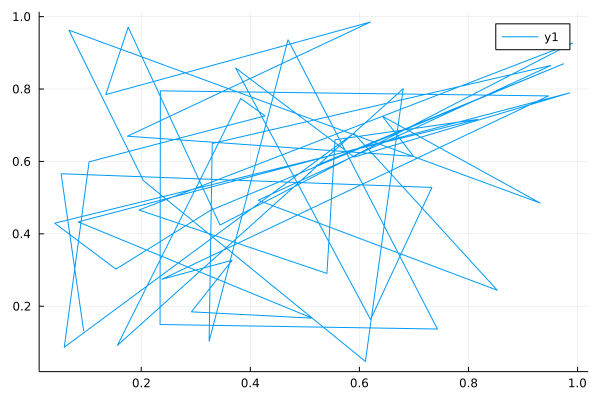

In [40]:
plot(data[:,1],data[:,2])

When the data in the file is separated by a symbol other than space, the corresponding argument must be written.

In [44]:
data = readdlm("example02.txt", skipstart=1)

50×1 Matrix{Any}:
 "0.81034,0.22350"
 "0.39312,0.68131"
 "0.99453,0.66464"
 "0.24778,0.35242"
 "0.16555,0.45460"
 "0.70053,0.35910"
 "0.66807,0.10538"
 "0.37159,0.41907"
 "0.81777,0.08121"
 "0.55486,0.17452"
 "0.39705,0.75475"
 "0.02905,0.48740"
 "0.71874,0.48111"
 ⋮
 "0.92545,0.20083"
 "0.18307,0.53254"
 "0.18025,0.90816"
 "0.31534,0.03286"
 "0.66533,0.66365"
 "0.11120,0.86049"
 "0.73541,0.24033"
 "0.48572,0.62969"
 "0.52114,0.34046"
 "0.39943,0.49928"
 "0.30553,0.86210"
 "0.77526,0.87514"

In [46]:
data = readdlm("example02.txt", ',', skipstart=1)

50×2 Matrix{Float64}:
 0.81034  0.2235
 0.39312  0.68131
 0.99453  0.66464
 0.24778  0.35242
 0.16555  0.4546
 0.70053  0.3591
 0.66807  0.10538
 0.37159  0.41907
 0.81777  0.08121
 0.55486  0.17452
 0.39705  0.75475
 0.02905  0.4874
 0.71874  0.48111
 ⋮        
 0.92545  0.20083
 0.18307  0.53254
 0.18025  0.90816
 0.31534  0.03286
 0.66533  0.66365
 0.1112   0.86049
 0.73541  0.24033
 0.48572  0.62969
 0.52114  0.34046
 0.39943  0.49928
 0.30553  0.8621
 0.77526  0.87514

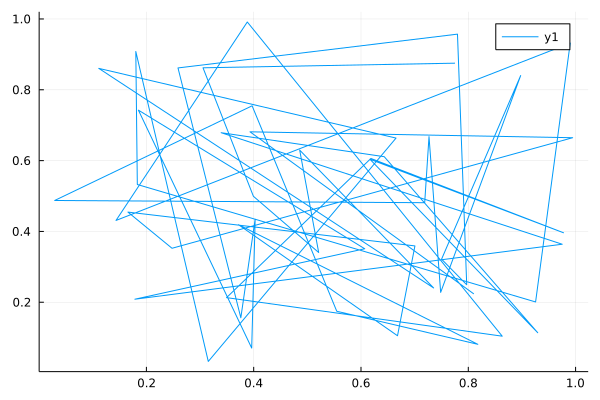

In [47]:
plot(data[:,1],data[:,2])

---

## 02. Writing plain text files

Again, the [DelimitedFiles](https://docs.julialang.org/en/v1/stdlib/DelimitedFiles/) library has a simple function for writing plain text files.

In [57]:
function f(x)
    return exp(-x^2/5)
end

wdata = zeros(100,2)

wdata[:,1] = LinRange(-10,10,100)
wdata[:,2] = f.(wdata[:,1])


writedlm("out_file1[julia].txt", wdata)


In [ ]:
# Para incluir un header
open("out_file2[julia].txt", write=true) do f
    write(f, "# This is the header of the file\n")
    writedlm(f, wdata)
end

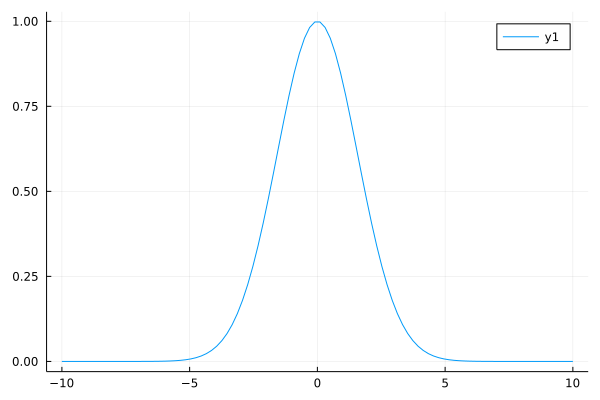

In [58]:
data = readdlm("out_file2[julia].txt", skipstart=1)
plot(data[:,1],data[:,2])

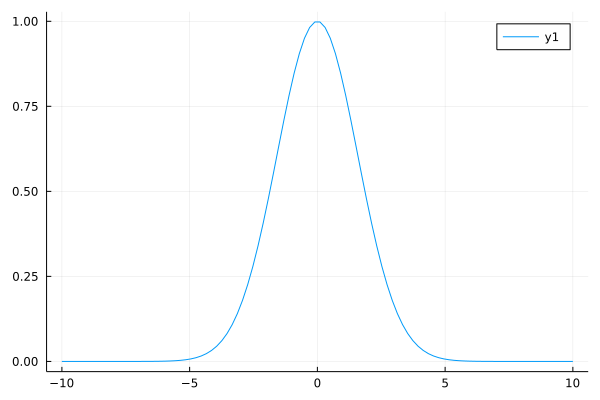

In [60]:
open("out_file3[julia].txt", write=true) do f
    write(f, "# This is the header of the file\n")
    writedlm(f, wdata, ',')
end


data = readdlm("out_file3[julia].txt", ',', skipstart=1)
plot(data[:,1],data[:,2])